In [1]:
print("hello")


hello


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("data/train.csv")

In [5]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
fig, ax.plt.subplots()
ax.scatter(df["LotArea"][:1000],df["SalePrice"][:1000])

NameError: name 'fig' is not defined

<Axes: ylabel='Frequency'>

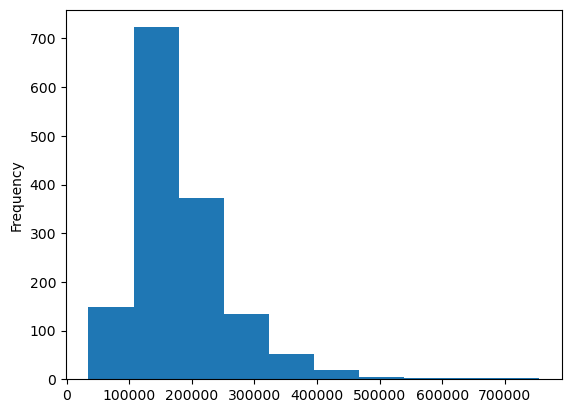

In [10]:
df.SalePrice.plot.hist()

In [11]:
df.sort_values(by=["LotArea"], inplace=True, ascending=True)

In [12]:
df.LotArea.head(20)

956     1300
1039    1477
614     1491
489     1526
1449    1533
1038    1533
75      1596
235     1680
232     1680
225     1680
430     1680
655     1680
1219    1680
1291    1680
837     1680
1029    1680
363     1680
227     1869
434     1890
500     1890
Name: LotArea, dtype: int64

In [13]:
import sklearn


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [17]:
df["UsageBand"].dtype

KeyError: 'UsageBand'

In [18]:
df_tmp = df.copy()

In [19]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [20]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [21]:
df_tmp.to_csv("data/train_tmp.csv",
              index=False)

In [22]:
df_tmp = pd.read_csv("data/train_tmp.csv",
                     low_memory=False)

In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [24]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [25]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [58]:
df_tmp


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,957,160,5,24.0,1300,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1040,180,5,21.0,1477,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,615,180,5,21.0,1491,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
3,490,180,5,21.0,1526,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1450,180,5,21.0,1533,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,452,20,4,62.0,70761,2,0,1,3,1,...,False,False,False,False,False,True,True,True,False,False
1456,707,20,4,69.0,115149,2,0,2,3,1,...,False,False,False,False,False,True,True,True,False,False
1457,250,50,4,69.0,159000,2,0,2,3,1,...,False,False,False,False,False,True,True,False,False,False
1458,336,190,4,69.0,164660,1,0,1,2,1,...,False,False,False,False,False,True,True,False,False,False


In [27]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [28]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [59]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1
df_tmp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,957,160,5,24.0,1300,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1040,180,5,21.0,1477,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,615,180,5,21.0,1491,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
3,490,180,5,21.0,1526,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1450,180,5,21.0,1533,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,452,20,4,62.0,70761,2,0,1,3,1,...,False,False,False,False,False,True,True,True,False,False
1456,707,20,4,69.0,115149,2,0,2,3,1,...,False,False,False,False,False,True,True,True,False,False
1457,250,50,4,69.0,159000,2,0,2,3,1,...,False,False,False,False,False,True,True,False,False,False
1458,336,190,4,69.0,164660,1,0,1,2,1,...,False,False,False,False,False,True,True,False,False,False


In [34]:
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

LinearRegression()

In [35]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.8763954450675442

In [36]:
df_val = df_tmp[df_tmp.LotArea >= 10000]
df_train = df_tmp[df_tmp.LotArea < 10000]

len(df_val), len(df_train)

(623, 837)

In [37]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((837, 126), (837,), (623, 126), (623,))

In [38]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
show_scores(model)

{'Training MAE': 12033.538927080548,
 'Valid MAE': 27288.222582389666,
 'Training RMSLE': 0.11736990764552672,
 'Valid RMSLE': 0.1747930895458878,
 'Training R^2': 0.900980224136901,
 'Valid R^2': 0.6663185648068506}

In [57]:
df_test = pd.read_csv("data/test.csv",
                      low_memory=False,
                      )
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [62]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [63]:

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [44]:
set(X_train.columns) - set(df_test.columns)

set()

In [64]:
test_preds = model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BsmtFinSF1_is_missing
- BsmtFinSF2_is_missing
- BsmtFullBath_is_missing
- BsmtHalfBath_is_missing
- BsmtUnfSF_is_missing
- ...


In [46]:
set(X_train.columns) - set(df_test.columns)


set()

In [47]:
set()

set()

In [51]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,957,160,5,24.0,1300,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1040,180,5,21.0,1477,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,615,180,5,21.0,1491,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
3,490,180,5,21.0,1526,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1450,180,5,21.0,1533,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False


In [54]:
df_test=df_test-X_train

In [55]:
test_preds = model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BsmtFinSF1_is_missing
- BsmtFinSF2_is_missing
- BsmtFullBath_is_missing
- BsmtHalfBath_is_missing
- BsmtUnfSF_is_missing
- ...


In [56]:
df_test

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,Alley_is_missing,BedroomAbvGr,BldgType,BldgType_is_missing,BsmtCond,BsmtCond_is_missing,...,Street_is_missing,TotRmsAbvGrd,TotalBsmtSF,TotalBsmtSF_is_missing,Utilities,Utilities_is_missing,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,335.0,-668.0,0.0,0.0,0,0.0,-4.0,0,0.0,0,...,0,0.0,321.0,NaN,0.0,0,-10.0,-19.0,-19.0,1.0
1,699.0,0.0,0.0,0.0,0,2.0,-4.0,0,0.0,0,...,0,3.0,699.0,NaN,0.0,0,393.0,-12.0,-12.0,1.0
2,298.0,701.0,0.0,0.0,0,2.0,-4.0,0,0.0,0,...,0,3.0,298.0,NaN,0.0,0,116.0,25.0,26.0,0.0
3,296.0,678.0,0.0,0.0,0,2.0,-3.0,0,0.0,0,...,0,4.0,296.0,NaN,0.0,0,360.0,28.0,-4.0,1.0
4,650.0,0.0,0.0,0.0,0,1.0,1.0,0,0.0,0,...,0,2.0,650.0,NaN,0.0,0,0.0,22.0,22.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


set()

In [68]:
df_test.columns- X_train.columns

ValueError: operands could not be broadcast together with shapes (134,) (126,) 